<a href="https://colab.research.google.com/github/ranjaniv23/mle/blob/main/Apr24_JPMC_Session6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Process of building a NN
1. Define the Model - define topology, network arch, etc. (creating a class)
* ...
# define the model
model = ...
2. Compile the model - loss function, optimization (Adam, sgd) Gradient Descent.  (instantiating a class into an object) - 
* https://www.tensorflow.org/api_docs/python/tf/keras/optimizers.  
The three most common loss functions are:
* https://www.tensorflow.org/api_docs/python/tf/keras/losses
* ‘binary_crossentropy‘ for binary classification
* ‘sparse_categorical_crossentropy‘ for multi-class classification
* ‘mse‘ (mean squared error) for regression
* Metrics: https://www.tensorflow.org/api_docs/python/tf/keras/metrics
* ...
# compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
3. Fit the model - epochs (loops through the training dataset) and the batch size: num of samples ni an epoch used to estimate the models error. Slow. Training Process... cpu intensive
* # fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)
4. Evaluation of the model
* ...
# evaluate the model
loss = model.evaluate(X, y, verbose=0)
5. Make Predictions
* ...
# make a prediction
yhat = model.predict(X)





In [ ]:
# https://raw.githubusercontent.com/fenago/datasets/main/iris.csv

# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
path = "https://raw.githubusercontent.com/fenago/datasets/main/iris.csv"
df = read_csv(path, header=None)
df.sample(5)

,0,1,2,3,4
112,6.8,3.0,5.5,2.1,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
42,4.4,3.2,1.3,0.2,Iris-setosa
108,6.7,2.5,5.8,1.8,Iris-virginica
23,5.1,3.3,1.7,0.5,Iris-setosa


In [ ]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

In [ ]:
# ensure all data are floating point values
X = X.astype('float32')

In [ ]:
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [ ]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (50, 4) (100,) (50,)


In [ ]:
# determine the number of input features
n_features = X_train.shape[1]
n_features

4

In [ ]:
# Once the data has been preprocessed.  Go into the 5 steps to build a NN
# define model - Step 1
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# Step 2: Compile the model
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 3: Fit the model (train it)
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

Epoch 1/150
4/4 - 0s - loss: 0.0868 - accuracy: 0.9800 - 14ms/epoch - 3ms/step
Epoch 2/150
4/4 - 0s - loss: 0.0862 - accuracy: 0.9900 - 13ms/epoch - 3ms/step
Epoch 3/150
4/4 - 0s - loss: 0.0871 - accuracy: 0.9900 - 16ms/epoch - 4ms/step
Epoch 4/150
4/4 - 0s - loss: 0.0868 - accuracy: 0.9900 - 16ms/epoch - 4ms/step
Epoch 5/150
4/4 - 0s - loss: 0.0863 - accuracy: 0.9900 - 15ms/epoch - 4ms/step
Epoch 6/150
4/4 - 0s - loss: 0.0853 - accuracy: 0.9900 - 15ms/epoch - 4ms/step
Epoch 7/150
4/4 - 0s - loss: 0.0852 - accuracy: 0.9900 - 17ms/epoch - 4ms/step
Epoch 8/150
4/4 - 0s - loss: 0.0848 - accuracy: 0.9900 - 13ms/epoch - 3ms/step
Epoch 9/150
4/4 - 0s - loss: 0.0853 - accuracy: 0.9900 - 16ms/epoch - 4ms/step
Epoch 10/150
4/4 - 0s - loss: 0.0846 - accuracy: 0.9900 - 15ms/epoch - 4ms/step
Epoch 11/150
4/4 - 0s - loss: 0.0843 - accuracy: 0.9900 - 17ms/epoch - 4ms/step
Epoch 12/150
4/4 - 0s - loss: 0.0841 - accuracy: 0.9900 - 14ms/epoch - 3ms/step
Epoch 13/150
4/4 - 0s - loss: 0.0835 - accuracy: 

In [ ]:
# Step 4: Evaluation the model 
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

2/2 [==============================] - 0s 11ms/step - loss: 0.1415 - accuracy: 0.9600
Test Accuracy: 0.960


In [ ]:
# Step 5 is to make a prediction
# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

1/1 [==============================] - 0s 376ms/step
Predicted: [[9.9745876e-01 2.5412610e-03 5.0453375e-09]] (class=0)


# CNN

11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


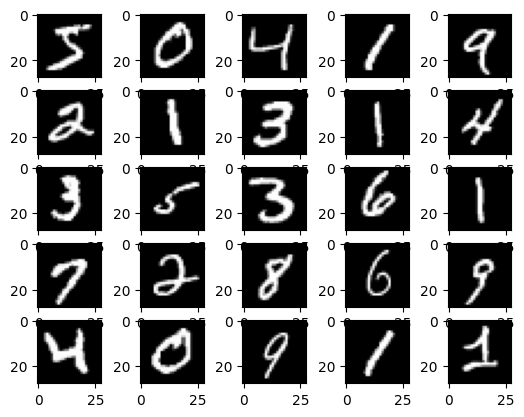

In [ ]:
# Use the built in MNIST dataset to do a quick CNN example
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(25):
 # define subplot
 pyplot.subplot(5, 5, i+1)
 # plot raw pixel data
 pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:

# example of a cnn for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
# make a prediction
image = x_train[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

(28, 28, 1) 10
Accuracy: 0.986
1/1 [==============================] - 0s 68ms/step
Predicted: class=5


In [ ]:
# make a prediction
image = x_train[19]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

1/1 [==============================] - 0s 26ms/step
Predicted: class=9


# RNN Example

In [ ]:
!pip install transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.7 MB/s eta 0:00:00


In [ ]:
from transformers import MarianMTModel, MarianTokenizer

In [ ]:
def translate(text, target_language):
    model_name = f'Helsinki-NLP/opus-mt-en-{target_language}'
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    inputs = tokenizer.encode(text, return_tensors="pt")
    outputs = model.generate(inputs, num_beams=4, max_length=50, early_stopping=True)
    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return translated_text

In [ ]:
input_text = "Hello, how are you?"
target_language = 'es'
translated_text = translate(input_text, target_language)
print(translated_text)

/usr/local/lib/python3.9/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Hola, ¿cómo estás?


In [ ]:
input_text = "What is your name.  My name is Dr. Lee"
target_language = 'es'
translated_text = translate(input_text, target_language)
print(translated_text)

/usr/local/lib/python3.9/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Me llamo Dr. Lee.


# Other Features of NN


In [ ]:
# Visualize the NN
# example of summarizing a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                90        
                                                                 
 dense_6 (Dense)             (None, 8)                 88        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


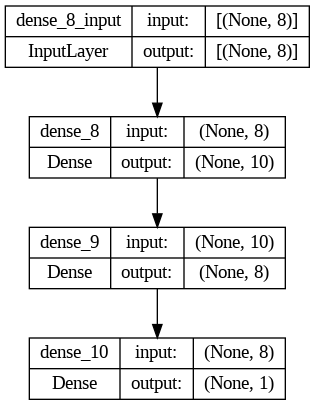

In [ ]:
# example of plotting a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
plot_model(model, 'model.png', show_shapes=True)

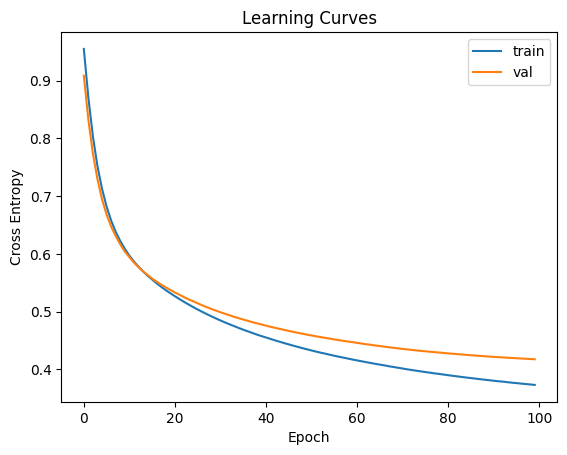

In [ ]:

# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
# to save the model
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# example of saving a fit model
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# save model to file
model.save('model.h5')

In [ ]:

# example of loading a saved model
from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model
# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
# load the model from file
model = load_model('model.h5')
# make a prediction
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat[0])

In [ ]:
# Reduce Overfitting with Dropout (Regularization)

# example of using dropout
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from matplotlib import pyplot
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

In [ ]:

# example of using batch normalization
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from matplotlib import pyplot
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

In [ ]:
# example of using early stopping
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# configure early stopping: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/
es = EarlyStopping(monitor='val_loss', patience=5)
# fit the model
history = model.fit(X, y, epochs=200, batch_size=32, verbose=1, validation_split=0.3, callbacks=[es])

Epoch 1/200
22/22 [==============================] - 2s 30ms/step - loss: 0.6261 - val_loss: 0.6084
Epoch 2/200
22/22 [==============================] - 0s 10ms/step - loss: 0.5749 - val_loss: 0.5722
Epoch 3/200
22/22 [==============================] - 0s 11ms/step - loss: 0.5371 - val_loss: 0.5463
Epoch 4/200
22/22 [==============================] - 0s 12ms/step - loss: 0.5093 - val_loss: 0.5267
Epoch 5/200
22/22 [==============================] - 0s 12ms/step - loss: 0.4878 - val_loss: 0.5111
Epoch 6/200
22/22 [==============================] - 0s 10ms/step - loss: 0.4705 - val_loss: 0.4976
Epoch 7/200
22/22 [==============================] - 0s 13ms/step - loss: 0.4558 - val_loss: 0.4862
Epoch 8/200
22/22 [==============================] - 0s 12ms/step - loss: 0.4428 - val_loss: 0.4765
Epoch 9/200
22/22 [==============================] - 0s 16ms/step - loss: 0.4312 - val_loss: 0.4669
Epoch 10/200
22/22 [==============================] - 0s 13ms/step - loss: 0.4206 - val_loss: 0.4587

In [ ]:
# train_model.py
import joblib
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

joblib.dump(classifier, 'iris_rf_model.pkl')

['iris_rf_model.pkl']